<a href="https://colab.research.google.com/github/FVaisfeld/ml/blob/main/data_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check for bias between chinese and our data

In this lab, I will check if we need to do some fine tuning or if we can just use the chinese data for training an arrythia model on out data. 



In [ ]:
# Install this package to use Colab's GPU for training
#!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Run the code below to load the dataset `Chinese_Cardisio_Combined.mat` and adjust the format of the data



In [45]:
from scipy import io
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

#define helpers for loading 
def load(name):
    mat_name = name + '.mat'
    temp = io.loadmat(mat_name)
    file = []
    try:
      [file.append(float(n[0])) for n in temp[name]]
    except:
        if name == 'card_label':
          [file.append((n[0][0])) for n in temp['card_label']]
        if 'measurement' in name:
          [file.append((n)) for n in temp['card_label']]
        else: 
          [file.append((n[0][0])) for n in temp[name]]
    return np.array(file)

In [46]:

#age = load('Age')
#print(age)
#sex = load('Sex')
#print(sex)
#chinese_labels = load('chinese_label')
#print(set(chinese_labels))
#cardisio_labels = load('cardisio_label')
#print(set(cardisio_labels))
#all_labels = load('Labels')






#load data Cardisio
#cardisio_measurements_temp = io.loadmat('Cardisio_measurements.mat')
#cardisio_measurements = []
#[cardisio_measurements.append(n) for n in cardisio_measurements_temp['Cardisio_measurements']]
#[N_Cardisio, N_Features] = np.shape(cardisio_measurements)
#print(str('Number Features: ' + str(N_Features) + ' \nNumber Measurements CARDISIO: '+ str(N_Cardisio)))

#load data Chinese
#chinese_measurements_temp = io.loadmat('Chinese_measurements.mat')
#chinese_measurements = []
#[chinese_measurements.append(n) for n in chinese_measurements_temp['Chinese_measurements']]
#[N_Chinese, N_Features] = np.shape(chinese_measurements)
#print(str('Number Measurements CHINA: '+ str(N_Chinese)))

In [47]:

train = pd.read_csv('train_features.csv')
train_features_healthy = train[train.label=='class_one']
train_features_sick = train[train.label=='class_two']
train_features_healthy = train_features_healthy.iloc[:,0:88]
train_features_sick = train_features_sick.iloc[:,0:88]
print(set(train.label))


test = pd.read_csv('test_features.csv')
test_features = test[test.cohort=='Cardisio']
test_features_healthy = test_features[test_features.label=='class_one']
test_features_sick = test_features[test_features.label=='class_two']
test_features_healthy = test_features_healthy.iloc[:,0:88]
test_features_sick = test_features_sick.iloc[:,0:88]
print(set(test.label))

{nan, 'class_one'}
{'class_one', 'class_two'}


First check the personal parameters for NaNs and then plot 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/lo

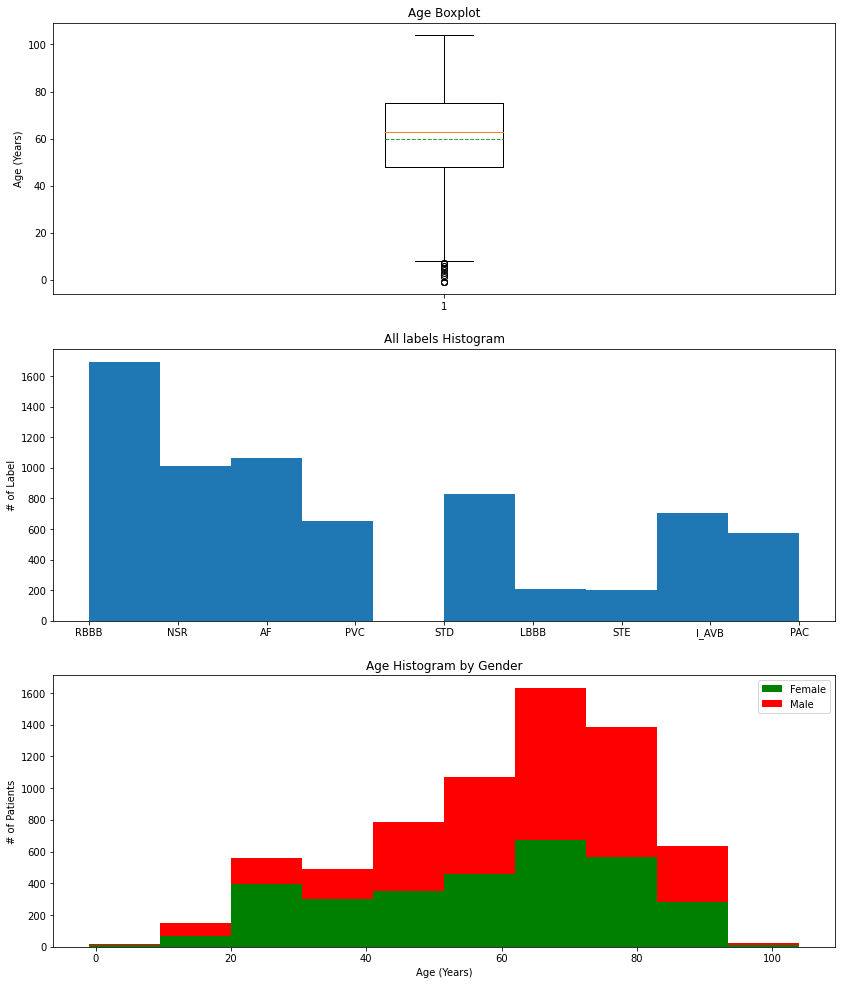

In [ ]:
#only use AF and NSR
sick_ind_chinese = [i for i,l in enumerate(chinese_labels) if l=='AF']
healthy_ind_chinese = [i for i,l in enumerate(chinese_labels) if l=='NSR']
sick_ind_cardisio = [i for i,l in enumerate(cardisio_labels) if l=='AF']
healthy_ind_cardisio = [i for i,l in enumerate(cardisio_labels) if l=='NSR']



# check if array contains NaNs 
ind_age = [i for i,a in enumerate(age) if not np.isnan(a)]
ind_sex = [i for i,s in enumerate(sex)  if not s=='[nan]']
ind_age = np.array(ind_age)
ind_sex = np.array(ind_sex)
# find common indice in age and sex
ind_sex_age = (set(ind_age)).union(set(ind_sex))
ind_sex_age = np.array(ind_sex_age)

#check sex for male and female
female_ind = [i for i,s in enumerate(sex) if s=='Female']
male_ind = [i for i,s in enumerate(sex) if s=='Male']

#todo: labels into healthy and sick and check for correlations with pps




plt.figure(figsize=[14,17])
plt.subplot(311)
plt.boxplot(age[ind_age], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(312)
plt.hist(all_labels)
plt.title('All labels Histogram')
plt.ylabel('# of Label')



plt.subplot(313)
plt.hist(x = [ [age[i] for i in female_ind], [age[i] for i in male_ind] ], 
         stacked=True, color = ['g','r'],label = ['Female','Male'])
plt.title('Age Histogram by Gender')
plt.xlabel('Age (Years)')
plt.ylabel('# of Patients')
plt.legend()


Let's now check the data for NaNs and outliers..

Let's check the data for distributions and correlations of the data. The imported feature matrix is a scatter transform of the classes AF and NSR of the chinese data.


In [39]:
#zero mean and standart variance
def scale(measurements,flag):
  #flag==0 normal scaling, flag==1 outlier robust scaling
  measurements = np.array(measurements)
  if flag:
    scaler = RobustScaler()
  else:
    scaler = StandardScaler()
  scaler.fit(measurements)
  measurements = scaler.transform(measurements)
  return measurements

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

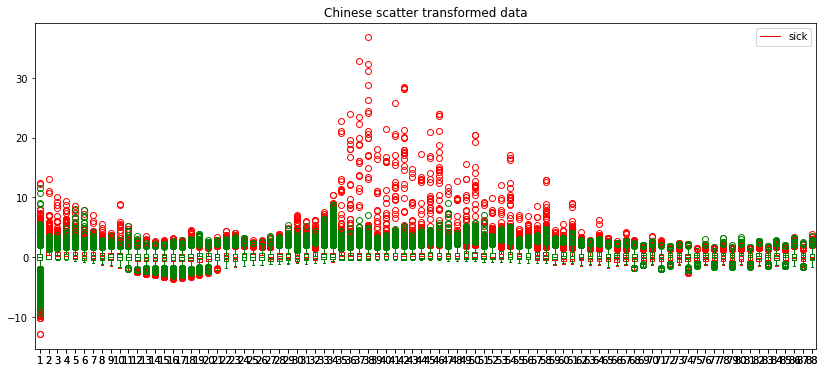

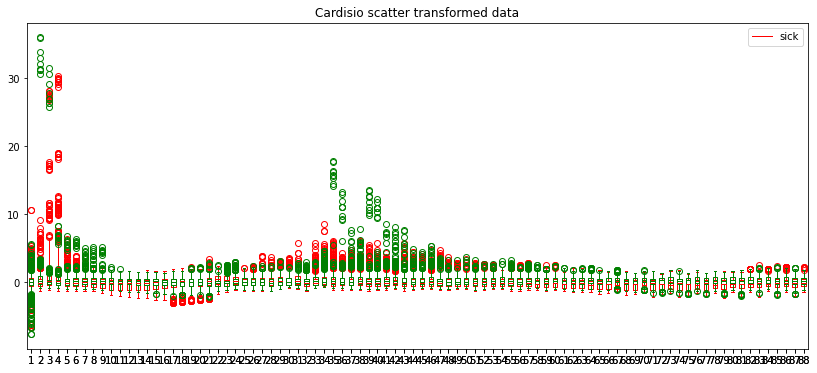

In [ ]:
#chinese data
chinese_measurements = scale(chinese_measurements,1)

f, ax = plt.subplots(figsize=(14, 6))
plt.title("Chinese scatter transformed data")
box1 = plt.boxplot( chinese_measurements[sick_ind_chinese,:])
c2 = 'red'
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box1[item], color=c2)
plt.setp(box1["fliers"], markeredgecolor=c2)
plt.legend({'sick'})


box2 = plt.boxplot(  chinese_measurements[healthy_ind_chinese,:])
c2 = 'green'
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box2[item], color=c2)
plt.setp(box2["fliers"], markeredgecolor=c2)
#plt.legend({'healthy'})





#cardisio data
cardisio_measurements = scale(cardisio_measurements,1)

f, ax = plt.subplots(figsize=(14, 6))
plt.title("Cardisio scatter transformed data")
box1 = plt.boxplot( cardisio_measurements[sick_ind_cardisio,:])
c2 = 'red'
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box1[item], color=c2)
plt.setp(box1["fliers"], markeredgecolor=c2)
plt.legend({'sick'})


box2 = plt.boxplot(  cardisio_measurements[healthy_ind_cardisio,:])
c2 = 'green'
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box2[item], color=c2)
plt.setp(box2["fliers"], markeredgecolor=c2)
#plt.legend({'healthy'})



#cardisio_measurements = cardisio_measurements[yhat != -1,:]
#yhat = iso.fit_predict(chinese_measurements)
#print(np.count_nonzero(yhat==1))
#print(np.count_nonzero(yhat==-1))
#chinese_measurements = chinese_measurements[yhat != -1,:]

The two plots show the features that were created by the scatter transform. The scatter transform can be seen as a robust presentation of the signal, that's invariant for translation and rotation. It gets trained in an unsupervised way. 
The transformation is trained with the two classes NSR and AF. 
Problematic is, that the representation of the sick class seems to be unbound and a lot of features of the sick class appear to be outliers. Furthermore the sick representation does not seem to match between the Cardisio and the Chinese data. 
My suggestion is to use all the classes of the Chinese data to train the scatter transform. More data generally has a leads to better unsupervised representation. 

Let's see if a pretraining with more data and more classes can lead to a more robust representation. (new feature matrices from 28th of September)

[None]

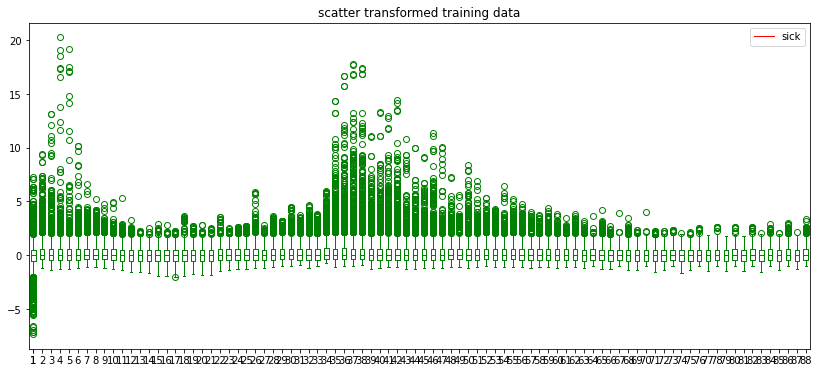

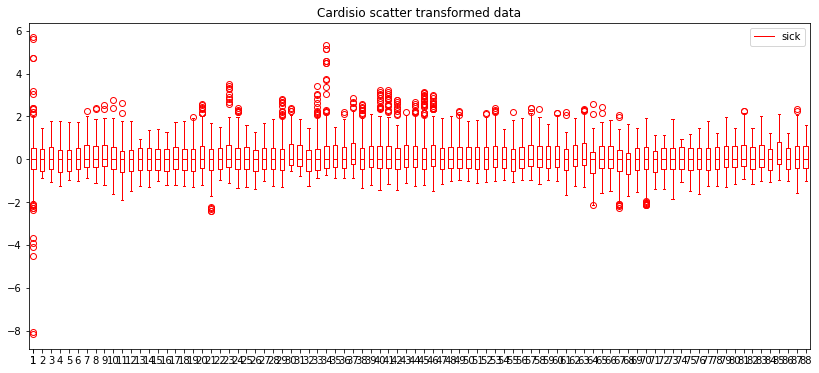

In [49]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler






#training data
#train_features_sick = scale(train_features_healthy,0)
train_features_healthy = scale(train_features_healthy,1)


f, ax = plt.subplots(figsize=(14, 6))
plt.title("scatter transformed training data")
box1 = plt.boxplot( train_features_sick)
c2 = 'red'
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box1[item], color=c2)
plt.setp(box1["fliers"], markeredgecolor=c2)
plt.legend({'sick'})


box2 = plt.boxplot(  train_features_healthy)
c2 = 'green'
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box2[item], color=c2)
plt.setp(box2["fliers"], markeredgecolor=c2)
#plt.legend({'healthy'})





#cardisio data
test_features_sick = scale(test_features_sick,1)

f, ax = plt.subplots(figsize=(14, 6))
plt.title("Cardisio scatter transformed data")
box1 = plt.boxplot( test_features_sick)
c2 = 'red'
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box1[item], color=c2)
plt.setp(box1["fliers"], markeredgecolor=c2)
plt.legend({'sick'})


box2 = plt.boxplot(  test_features_healthy)
c2 = 'green'
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box2[item], color=c2)
plt.setp(box2["fliers"], markeredgecolor=c2)
#plt.legend({'healthy'})



#cardisio_measurements = cardisio_measurements[yhat != -1,:]
#yhat = iso.fit_predict(chinese_measurements)
#print(np.count_nonzero(yhat==1))
#print(np.count_nonzero(yhat==-1))
#chinese_measurements = chinese_measurements[yhat != -1,:]

In [ ]:
#smote oversampling 
import seaborn as sns

#get correlations of each features in dataset
corrmat = np.corrcoef(np.transpose(chinese_measurements))
fig = plt.figure(figsize=(10,10))
#plot heat map
img = plt.imshow(corrmat, cmap='hot')
plt.show()
#plt.colorbar(fig)

#get correlations of each features in dataset
corrmat = np.corrcoef(np.transpose(cardisio_measurements))
fig = plt.figure(figsize=(10,10))
#plot heat map
img = plt.imshow(corrmat, cmap='hot')
plt.show()
#plt.colorbar(fig)





#dim reduction? check for correlations and also feature selection 
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(np.transpose(cardisio_measurements))
cardisio_measurements_pca = pca.transform(np.transpose(cardisio_measurements))

corrmat = np.corrcoef((cardisio_measurements_pca))
plt.figure(figsize=(10,10))
#plot heat map
plt.imshow(corrmat, cmap='hot')
plt.show()



#f, ax = plt.subplots(figsize=(16, 8))
#fig = plt.boxplot(chinese_measurements)
#check features for correlations with personal parameters


#graph individual features by survival
#fig, saxis = plt.subplots(2, 3,figsize=(16,12))

#sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
#sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
#sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

#sns.pointplot(x = 'FareBin', y = 'Survived',  data=data1, ax = saxis[1,0])
#sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
#sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])

In [ ]:
#pair plots of entire dataset
pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])